In [1]:
from common import utils
import random
u=utils(False)

Ce cours a √©t√© r√©g√©n√©r√© le 2018-08-28 17:25:43.681601


# Les textes
## De l'√©crit aux nombres
### Du texte au(x) glyphe(s)

Les √©crits sous forme d'images ne sont pas exploitables; l'√©criture est donc simplifi√©e pour ne retenir que les *caract√®res* les uns √† la suite des autres (‚â†*lettres*).

On a assembl√© les caract√®res qui √©taient n√©cessaires pour √©crire une langue en ¬´ alphabets ¬ª qui comprenaient lettres, chiffres, caract√®res de ponctuation et autres symboles techniques. Ces ensemble s'appellent des *jeux de caract√®res*.

Cette technique descend des techniques invent√©es par les Chinois (IX<sup>e</sup> si√®cle) et les Europ√©ens (Gutenberg, XV<sup>e</sup> si√®cle). Les jeux de caract√®res √©taient alors physiquement des collections d'√©l√©ments mobiles (en bois, en terre cuite, en plomb...) qui √©taient rang√©s dans une caisse (appell√©e *casse*) et servaient √† transf√©rer de l'encre sur du papier.

De nos jours, les caract√®res ne sont pas rang√©s dans une caisse, ils sont contenus dans une sorte de programme informatique sp√©cialis√© qu'on appelle une police (anglais : *font*) et qui correspond √† la d√©nomination ancienne en imprimerie.

Les raisons historiques font qu'on a eu des jeux de caract√®res diff√©rents selon les r√©gions et les fabricants. Depuis les ann√©es 2000, un jeu de caract√®res qui contient tous les autres s'impose lentement : le jeu de caract√®re [Unicode](https://fr.wikipedia.org/wiki/Unicode).

Les glyphes sont les dessins des lettres, diff√©rents selon les polices. Une m√™me police de caract√®re peut supporter plusieurs jeux de caract√®res (tant qu'il sait faire l'association caract√®re ‚Üí glyphe), le dessin proprement dit n'est stock√© qu'une seule fois.

Parce que les ordinateurs manient tr√®s bien les nombre, un texte est donc repr√©sent√© par des nombres dont les valeurs sont fix√©es par le jeu de caract√®res. Toutefois, selon ces jeux de caract√®res, les nombres peuvent atteindre de grandes valeurs. Lorsque le nombre de caract√®res possibles ne d√©passe pas 256, on utilise un octet pour chaque caract√®re ; mais sinon, on doit recourir √† un *encodage* plus compliqu√© qui va permettre de transformer le nombre en un ou plusieurs octets. Cette table doit permettre √©videmment d'aller dans un sens, et dans l'autre.

![test](images/A-small_glyphs.svg)


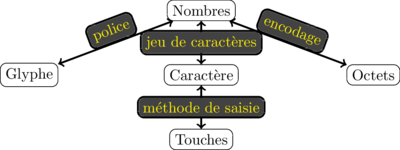

In [2]:
%%tikz
        \tikzstyle{every node}=[fill=white,draw=black,rounded corners]
        \tikzstyle{xlabel}=[text=yellow,fill=black!80,fill opacity=30,text opacity=1]
        \tikzstyle{normally}=[very thick]
        \node (a) at (0,0) {Glyphe};
        \node (b) at (4,1.5) {Nombres}
        edge  [<->,normally] node[xlabel,above,sloped] {police} (a);
        \node (c) at (4,0) {Caract√®re}
        edge  [<->,normally] node[xlabel] {jeu de caract√®res} (b);
        \node (d) at (4,-1.5) {Touches}
        edge  [<->,normally] node[xlabel] {m√©thode de saisie} (c);
        \node (d) at (8,0) {Octets}
        edge  [<->,normally] node[xlabel,above,sloped] {encodage} (b);


### Les ligatures
Les ligatures sont une caract√©ristique de l'√©criture qui vient de l'√©criture manuscrite. Cela consiste √† modifier l'√©criture d'une paire (ou plus) de lettres en fonction des lettres voisines.

Certaines ligatures sont pass√©es dans la langue au point que les lettres li√©es forment une nouvelle lettre √† part enti√®re (et o√π les lettres d√©tach√©es existent ind√©pendamment des lettres li√©es). On peut penser par exemple au ≈ì en fran√ßais, au ƒ≥ en n√©erlandais, au ch espagnol (qui est tri√© diff√©remment : il est entre le C et le D, et non pas entre CE et CI). Ces caract√®res ont en g√©n√©ral leur place dans le jeu de caract√®res de fa√ßon autonome.

D'autres ligatures sont des ligatures dites esth√©tiques : la langue arabe par exemple modifie fortement le dessin des lettres en fonction des celles qui sont devant et derri√®res. La repr√©sentation de ces langues se fait en g√©n√©ral par les caract√®res √©l√©mentaires, la t√¢che de la ligature √©tant report√©e sur la police.

> **Exemple :** La lettre ≈í (ligature linguistique) est diff√©rente de OE . La lettre fi repr√©sente deux caract√®res, avec affichage <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>Ô¨Å</span> (ligature esth√©tique pour √©viter le <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>f‚Äãi</span> ) o√π le <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>f</span> rencontre le <span style='font-size: 30px; font-family: "Liberation Serif", "Times New Roman", Times, serif;'>i</span>.
> En arabe ou sanskrit, la ligature est obligatoire mais esth√©tique : ÿ™ŸàŸÜÿ≥ est la forme li√©e de ÿ™ Ÿà ŸÜ ÿ≥ (se prononce Tounisse, c'est la ville de Tunis). 

### Jeux de caract√®res et encodage

Au d√©but √©tait un certain nombre de jeux de caract√®res sur 7 ou 8 bits par caract√®res. Un seul a vraiment surv√©cu : l'[ASCII](https://fr.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange).

Il en existe donc d'autres, principalement des jeux de caract√®res *r√©gionaux* :

  * Normes [ISO-8859](https://fr.wikipedia.org/wiki/ISO_8859) qui compte une quinzaine de jeux de caract√®res diff√©rents qui couvrent √† eux tous les langues europ√©ennes, l'arabe, le grec, le russe, l'h√©breu, le turc.
  * L'[Unicode](https://fr.wikipedia.org/wiki/Unicode) qui pr√©sente de [nombreux caract√®res](http://hapax.qc.ca/Tableaux-10.0.htm)

### La table ASCII

Le jeu de caract√®re ASCII comporte 128 caract√®res et pouvait √™tre cod√© sur 7 bits par caract√®re. On l'utilise maintenant exclusivement sur 8 bits (avec des num√©ros inutilis√©s). Les caract√®res entre 0 et 31 sont des *caract√®res de contr√¥le* qui avaient des effets sur les terminaux mais n'avaient pas de forme, de 32 √† 126 les *caract√®res affichables* (que vous connaissez).

| N¬∞ | ? | N¬∞ | ? | N¬∞ | ? | N¬∞ | ? | N¬∞ | ? | N¬∞ | ? | N¬∞ | ? | N¬∞ | ? |
|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|
| 00 | NUL | 01 | SOH| 02 | STX | 03 | ETX | 04 | EOT | 05 | ENQ | 06 | ACK | 07 | BEL |
| 08 | BS  | 09 | HT | 0A | NL | 0B | VT | 0C | NP | 0D | CR | 0E | SO | 0F | SI |
| 10 | DLE | 11 | DC1| 12 | DC2 | 13 | DC3 | 14 | DC4 | 15 | NAK | 16 | SYN | 17 | ETB |
| 18 | CAN | 19 | EM | 1A | SUB | 1B | ESC | 1C | FS | 1D | GS | 1E | RS | 1F | US |
| 20 | SP  | 21 | !  | 22 | " | 23 | # | 24 | \$ | 25 | \% | 26 | \ |  | 27 | ' |
| 28 | ( | 29 | ) | 2A | * | 2B | + | 2C | , | 2D | - | 2E | . | 2F | / |
| 30 | 0 | 31 | 1 | 32 | 2 | 33 | 3 | 34 | 4 | 35 | 5 | 36 | 6 | 37 | 7 |
| 38 | 8 | 39 | 9 | 3A | : | 3B | ; | 3C | < | 3D | = | 3E | > | 3F | ? |
| 40 | @ | 41 | A | 42 | B | 43 | C | 44 | D | 45 | E | 46 | F | 47 | G |
| 48 | H | 49 | I | 4A | J | 4B | K | 4C | L | 4D | M | 4E | N | 4F | O |
| 50 | P | 51 | Q | 52 | R | 53 | S | 54 | T | 55 | U | 56 | V | 57 | W |
| 58 | X | 59 | Y | 5A | Z | 5B | [ | 5C | \ | 5D | ] | 5E | ^ | 5F | _ |
| 60 | ` | 61 | a | 62 | b | 63 | c | 64 | d | 65 | e | 66 | f | 67 | g |
| 68 | h | 69 | i | 6A | j | 6B | k | 6C | l | 6D | m | 6E | n | 6F | o |
| 70 | p | 71 | q | 72 | r | 73 | s | 74 | t | 75 | u | 76 | v | 77 | w |
| 78 | x | 79 | y | 7A | z | 7B | { | 7C | &#x7C; | 7D | } | 7E | ~ | 7F | DEL |

In [3]:
u.activite("La table ASCII")
specials = {"SP" : "'espace (ordinaire)", "TAB": "e caract√®re de tabulation", "BEL": "a cloche", "NL": "a nouvelle ligne","CR": "e retour chariot", "NUL": "e caract√®re nul", "ESC" : "e caract√®re d'√©chappement (escape)", "BS": "e retour en arri√®re (backspace)" }
for i in range(0,2):
    num=random.choice(range(32,127))
    xchar='0x{:02x}'.format(num)
    xcharx='{:c}'.format(num)
    u.solutioncheck("Quel caract√®re correspond au code "+xchar+" ?",xcharx,"ok","Non, c'est ¬´ "+xcharx+" ¬ª")
special=random.choice(list(specials.keys()))

u.mark("√Ä quoi sert le caract√®re {0} ?".format(special))
u.solution("C'est l{0}.".format(specials[special]))
special=random.choice(list(specials.keys()))
x=u.solutioncheck("Quel est le nom qu'on donne pour l"+specials[special]+" ?",special,"ok","Non c'est ¬´ "+special+" ¬ª.")

#### Activit√© : La table ASCII

Quel caract√®re correspond au code 0x23 ? > `_____________________________________________________`

**Solution :** #

Quel caract√®re correspond au code 0x51 ? > `_____________________________________________________`

**Solution :** Q

√Ä quoi sert le caract√®re TAB ?

Votre proposition > `_____________________________________________________`

**Solution:** C'est le caract√®re de tabulation.

Quel est le nom qu'on donne pour la nouvelle ligne ? > `_____________________________________________________`

**Solution :** NL

### Jeux de caract√®res et codage
Les jeux de caract√®res √©tant des ensembles num√©rot√©s de caract√®res, il faut pouvoir associer √† chaque nombre-caract√®re une s√©quence d'octets qui permet de le reconna√Ætre.

Le probl√®me est simple si on a un nombre de caract√®res r√©duits (moins de 255). Mais si on en a plus, il faut trouver une association.

L'association simple en mettant plus d'octets pose rapidement le probl√®me de la taille des textes (notamment si certains caract√®res sont tr√®s fr√©quents et d'autres rares, mais existants). Cette transformation s'appelle *l'encodage*.

Les encodages existants sont de plusieurs sortes :

  * l'encodage banal qui √©crit le num√©ro sur un octet, r√©serv√© aux jeux de caract√®res √† moins de 255 caract√®res (ISO-8859, KOI8R). Inutilisable pour les langues asiatiques.
  * les encodages banals sur plusieurs octets (UCS2, UCS4, Big5)
  * les encodages √† d√©calage o√π certaines suites d'octets fixent une valeur de base $B$ et o√π les autres octets $n$ fixent la valeur finale qui est $B+n$
  * les encodages √† nombre d'octets variables (UTF-8)

Ces probl√®mes d'encodage n'ont pas √©t√© √©vidents tout de suite, et du coup, l'encodage et le jeu de caract√®res n'ont pas √©t√© tout de suite des donn√©es bien int√©gr√©es. Les simples fichiers textes par exemple ne retiennent ni l'un ni l'autre, et les valeurs sont devin√©es par des algorithmes... qui peuvent √©chouer.

Cet oubli, ou la mauvaise coordination entre plusieurs logiciels (qui ignorent les sp√©cifications donn√©es par les autres), a conduit √† multipli√© les exemples de mauvais encodages visibles par les utilisateurs. Ce ph√©nom√®ne a plusieurs noms, mais *mojibake* (le nom japonais) est un peu plus r√©pandu : krakozyabry en russe par exemple. On dit parfois *hieroglyphes* en fran√ßais.

Par exemple, deux personnes situ√©es en France et en Russie correspondaient et R a donn√© √† F son adresse pour se faire envoyer un paquet. Mais R a envoy√© son adresse en KOI8R, et le logiciel de F l'a devin√© (faussement) comme √©tant de l'ISO-8859-1... et a donc affich√© les mauvais caract√®res. Le postier a r√©ussi √† faire la transformation inverse, ce qui t√©moigne √† quel point ce genre de probl√®mes est courant.

    –†–æ—Å—Å–∏—è –ú–æ—Å–∫–≤–∞, 119415
    –ø—Ä.–í–µ—Ä–Ω–∞–¥—Å–∫–æ–≥–æ, 37,
    –∫.1817-1,
    –ü–ª–µ—Ç–Ω–µ–≤–æ–π –°–≤–µ—Ç–ª–∞–Ω–µ

Les octets sont les suivants: 

 * **000** `cff2 d3d3 d1c9 ed20 d3cf d7cb 2cc1 3120`
 * **010** `3931 3134 0a35 d2d0 f72e d2c5 c1ce d3c4`
 * **020** `cfcb cfc7 202c 3733 0a2c 2ecb 3831 3731`
 * **030** `312d 0a2c ccf0 d4c5 c5ce cfd7 20ca d7f3`
 * **040** `d4c5 c1cc c5ce`           

et en ISO-8859-1 √ßa s'affiche :

    √≤√è√ì√ì√â√ë √≠√è√ì√ã√ó√Å, 119415
    √ê√í.√∑√Ö√í√é√Å√Ñ√ì√ã√è√á√è, 37,
    √ã.1817-1,
    √∞√å√Ö√î√é√Ö√ó√è√ä √≥√ó√Ö√î√å√Å√é√Ö
    
![Exemple de mojibake manuscrit](images/mojibake.jpg)


In [4]:
u.activite("Ligatures")
# Police OFL Sorts Mill Goudy TT, sur le site https://code.thisarmy.com/fontsinfo/
u.mark('<p><img src="images/ligatures.png" alt="Les filles actent selon leur c≈ìur & les gar√ßons selon leur souffle." /></p>')
u.mark("Dans le texte ci-dessus, quelles sont les ligatures linguistiques que vous identifiez ?")
u.solution("Le [oe entrelac√©](https://fr.wikipedia.org/wiki/%C5%92) de *c≈ìur*, l'[esperluette &amp;](https://fr.wikipedia.org/wiki/Esperluette) et le [c c√©dille](https://fr.wikipedia.org/wiki/C%C3%A9dille) de *gar√ßon* sont des ligatures linguistiques, certaines tr√®s anciennes (‚Ö©‚Ö§‚Ö†<sup>e</sup>, ‚Ö§‚Ö†<sup>e</sup> et ‚Ö©‚Ö§‚Ö†‚Ö†<sup>e</sup> si√®cles).")
u.mark("Dans le texte ci-dessus, quelles sont les ligatures esth√©tiques que vous identifiez ?")
u.solution("Le fi, le ct et le ffl sont des ligatures linguistiques. De nos jours, le fi est l'une des seules qui reste fr√©quemment utilis√©e.")


#### Activit√© : Ligatures

<p><img src="images/ligatures.png" alt="Les filles actent selon leur c≈ìur & les gar√ßons selon leur souffle." /></p>

Dans le texte ci-dessus, quelles sont les ligatures linguistiques que vous identifiez ?

Votre proposition > `_____________________________________________________`

**Solution:** Le [oe entrelac√©](https://fr.wikipedia.org/wiki/%C5%92) de *c≈ìur*, l'[esperluette &amp;](https://fr.wikipedia.org/wiki/Esperluette) et le [c c√©dille](https://fr.wikipedia.org/wiki/C%C3%A9dille) de *gar√ßon* sont des ligatures linguistiques, certaines tr√®s anciennes (‚Ö©‚Ö§‚Ö†<sup>e</sup>, ‚Ö§‚Ö†<sup>e</sup> et ‚Ö©‚Ö§‚Ö†‚Ö†<sup>e</sup> si√®cles).

Dans le texte ci-dessus, quelles sont les ligatures esth√©tiques que vous identifiez ?

Votre proposition > `_____________________________________________________`

**Solution:** Le fi, le ct et le ffl sont des ligatures linguistiques. De nos jours, le fi est l'une des seules qui reste fr√©quemment utilis√©e.

In [5]:
u.activite("Encodage et hieroglyphes")
prenom=random.choice(["Camille","Emma","Maxime","Quentin","Marie","Alexandre","Sarah","L√©a","Thomas","Mathilde","Julien","Julie","Romain","Pierre","Lucas","Baptiste","Th√©o","Manon","Kevin","In√®s"])
u.solutioncheck("Est-il possible de repr√©senter le texte pr√©c√©dent dans le jeu de caract√®res ASCII [oui/non]","non","En effet, le ≈ì et le √ß ne font pas partie du jeu de caract√®res ASCII. Par contre, &amp; en fait partie.","Non ! Le ≈ì et le √ß ne font pas partie du jeu de caract√®res ASCII. Par contre, &amp; en fait bien partie.")
u.mark("Dans le jeu de caract√®res *latin9* (ISO-8859-15), il est possible de coder ce texte. {0} envoie ce texte √† Ru≈ºar, un correspondant √† Malte. Quand Ru≈ºar ouvre son mail, il lit : ¬´ Les filles actent selon leur c¬Ωur & les gar√ßons selon leur souffle. ¬ª. Expliquer pourquoi.".format(prenom))
u.solution("Le m√™me texte va √™tre interpr√©t√© selon ses octets, et sans la bonne sp√©cification de jeu de caract√®res, selon le jeu de caract√®re local par d√©faut. √Ä Malte, on utilise plut√¥t le ISO-8859-3 (Europe du Sud), qui est tr√®s similaire au ISO-8859-15, mais avec entre autres le ≈ì remplac√© par ¬Ω.")

#### Activit√© : Encodage et hieroglyphes

Est-il possible de repr√©senter le texte pr√©c√©dent dans le jeu de caract√®res ASCII [oui/non] > `_____________________________________________________`

**Solution :** non

Dans le jeu de caract√®res *latin9* (ISO-8859-15), il est possible de coder ce texte. L√©a envoie ce texte √† Ru≈ºar, un correspondant √† Malte. Quand Ru≈ºar ouvre son mail, il lit : ¬´ Les filles actent selon leur c¬Ωur & les gar√ßons selon leur souffle. ¬ª. Expliquer pourquoi.

Votre proposition > `_____________________________________________________`

**Solution:** Le m√™me texte va √™tre interpr√©t√© selon ses octets, et sans la bonne sp√©cification de jeu de caract√®res, selon le jeu de caract√®re local par d√©faut. √Ä Malte, on utilise plut√¥t le ISO-8859-3 (Europe du Sud), qui est tr√®s similaire au ISO-8859-15, mais avec entre autres le ≈ì remplac√© par ¬Ω.

![Les hi√©roglyphes de Martine](images/mojibake2.jpg)

### Unicode et UTF-8
Depuis les ann√©es 2000, les jeux de caract√®res qui ne sont ni ASCII, ni ISO-8850-1 se rar√©fient au profit d'Unicode, en particulier son encodage par UTF-8 et UTF-16. Unicode est une collection de plus de 100000 caract√®res qui ne sp√©cifie pas la fa√ßon de le repr√©senter par une s√©quence d'octets. La taille maximale est de $17\times 2^{16}$ et le code maximal 0x10FFFF. UTF-8 est une fa√ßon de transformer un num√©ro en une s√©quence d'octets. La norme qui correspond est formellement ¬´ ISO/CEI 10646:*ann√©e* ¬ª, la derni√®re en vigueur est ISO/CEI 10646:2012, aussi appell√©e  Unicode 6.1.

Dans l'encodage UTF-8, la conversion se fait √† l'aide de cette table :

| Valeurs         | √âcriture binaire         | Codage UTF-8 (binaire)      | octets |
|-----------------|--------------------------|-----------------------------|--------|
|0x0--0x7F        |   abc defg               |0abc defg                    | 1      |
|0x80--0x7FF      |   abc defg hijk          |110a bcde 10fg hijk          | 2      |
|0x800--0xFFFF    |  abcd efgh ijkl mnop     |1110 abcd 10ef ghij 10kl mnop| 3      |
|0x10000--0x1FFFFF|a bcde fghi jklm nopq rstu|1111 0abc 10de fghi 10jk lmno 10pq rstu|4|

Il existe d'autres encodages pour Unicode : UCS-2 (partiel, ne couvre que $2^{16}$ caract√®res), UCS-4 qui sont des encodages √† taille fixe multi-octets, UTF-16 (qui permet de repr√©senter tout le premier plan de base en 2 octets, et le reste avec 4 octets).

Dans le jeu de caract√®re Unicode (c'est ind√©pendant de l'encodage), il existe plusieurs fa√ßons de repr√©senter les m√™mes glyphes. Par exemple, on peut donner le caract√®re ¬´ √© ¬ª et le caract√®re ¬´ e ¬ª  et ¬´ ÃÅ ¬ª (qui est l'accent aigu combinant). Si on met ces deux derniers l'un derri√®re l'autre on obtient ¬´ eÃÅ ¬ª qui sont deux caract√®res mais affich√©s avec un seul glyphe.

La notion de normalisation (combinaison maximale : on combine pour obtenir les caract√®res pr√©-combin√©s ou combinaison minimale : on combine pour obtenir le maximum de caract√®res ind√©pendants) permet de comparer facilement deux textes et de savoir s'ils repr√©sentent la m√™me chose. Toutefois, cela ne permet pas de distinguer des caract√®res diff√©rents qui par hasard auraient le m√™me glyphe (A, –ê et Œë par exemple sont trois caract√®res diff√©rents: la premi√®re lettre des alphabets latin, cyrillique et grec).

In [6]:
import random
import unicodedata
import re
ranges=[[0,127],[128,2047],[2048,65535],[0x11000,129647]]
def block(ch):
  '''
  Return the Unicode block name for ch, or None if ch has no block.

  >>> block(u'a')
  'Basic Latin'
  >>> block(unichr(0x0b80))
  'Tamil'
  >>> block(unichr(0xe0080))

  '''

  cp = ord(ch)
  for start, end, name in _blocks:
    if start <= cp <= end:
      return name
  return "None"

def _initBlocks(text):
  global _blocks
  _blocks = []
  import re
  pattern = re.compile(r'([0-9A-F]+)\.\.([0-9A-F]+);\ (\S.*\S)')
  for line in text.splitlines():
    m = pattern.match(line)
    if m:
      start, end, name = m.groups()
      _blocks.append((int(start, 16), int(end, 16), name))
_initBlocks('''
# http://unicode.org/Public/UNIDATA/Blocks.txt
0000..007F; Basic Latin
0080..00FF; Latin-1 Supplement
0100..017F; Latin Extended-A
0180..024F; Latin Extended-B
0250..02AF; IPA Extensions
02B0..02FF; Spacing Modifier Letters
0300..036F; Combining Diacritical Marks
0370..03FF; Greek and Coptic
0400..04FF; Cyrillic
0500..052F; Cyrillic Supplement
0530..058F; Armenian
0590..05FF; Hebrew
0600..06FF; Arabic
0700..074F; Syriac
0750..077F; Arabic Supplement
0780..07BF; Thaana
07C0..07FF; NKo
0800..083F; Samaritan
0840..085F; Mandaic
0860..086F; Syriac Supplement
08A0..08FF; Arabic Extended-A
0900..097F; Devanagari
0980..09FF; Bengali
0A00..0A7F; Gurmukhi
0A80..0AFF; Gujarati
0B00..0B7F; Oriya
0B80..0BFF; Tamil
0C00..0C7F; Telugu
0C80..0CFF; Kannada
0D00..0D7F; Malayalam
0D80..0DFF; Sinhala
0E00..0E7F; Thai
0E80..0EFF; Lao
0F00..0FFF; Tibetan
1000..109F; Myanmar
10A0..10FF; Georgian
1100..11FF; Hangul Jamo
1200..137F; Ethiopic
1380..139F; Ethiopic Supplement
13A0..13FF; Cherokee
1400..167F; Unified Canadian Aboriginal Syllabics
1680..169F; Ogham
16A0..16FF; Runic
1700..171F; Tagalog
1720..173F; Hanunoo
1740..175F; Buhid
1760..177F; Tagbanwa
1780..17FF; Khmer
1800..18AF; Mongolian
18B0..18FF; Unified Canadian Aboriginal Syllabics Extended
1900..194F; Limbu
1950..197F; Tai Le
1980..19DF; New Tai Lue
19E0..19FF; Khmer Symbols
1A00..1A1F; Buginese
1A20..1AAF; Tai Tham
1AB0..1AFF; Combining Diacritical Marks Extended
1B00..1B7F; Balinese
1B80..1BBF; Sundanese
1BC0..1BFF; Batak
1C00..1C4F; Lepcha
1C50..1C7F; Ol Chiki
1C80..1C8F; Cyrillic Extended-C
1C90..1CBF; Georgian Extended
1CC0..1CCF; Sundanese Supplement
1CD0..1CFF; Vedic Extensions
1D00..1D7F; Phonetic Extensions
1D80..1DBF; Phonetic Extensions Supplement
1DC0..1DFF; Combining Diacritical Marks Supplement
1E00..1EFF; Latin Extended Additional
1F00..1FFF; Greek Extended
2000..206F; General Punctuation
2070..209F; Superscripts and Subscripts
20A0..20CF; Currency Symbols
20D0..20FF; Combining Diacritical Marks for Symbols
2100..214F; Letterlike Symbols
2150..218F; Number Forms
2190..21FF; Arrows
2200..22FF; Mathematical Operators
2300..23FF; Miscellaneous Technical
2400..243F; Control Pictures
2440..245F; Optical Character Recognition
2460..24FF; Enclosed Alphanumerics
2500..257F; Box Drawing
2580..259F; Block Elements
25A0..25FF; Geometric Shapes
2600..26FF; Miscellaneous Symbols
2700..27BF; Dingbats
27C0..27EF; Miscellaneous Mathematical Symbols-A
27F0..27FF; Supplemental Arrows-A
2800..28FF; Braille Patterns
2900..297F; Supplemental Arrows-B
2980..29FF; Miscellaneous Mathematical Symbols-B
2A00..2AFF; Supplemental Mathematical Operators
2B00..2BFF; Miscellaneous Symbols and Arrows
2C00..2C5F; Glagolitic
2C60..2C7F; Latin Extended-C
2C80..2CFF; Coptic
2D00..2D2F; Georgian Supplement
2D30..2D7F; Tifinagh
2D80..2DDF; Ethiopic Extended
2DE0..2DFF; Cyrillic Extended-A
2E00..2E7F; Supplemental Punctuation
2E80..2EFF; CJK Radicals Supplement
2F00..2FDF; Kangxi Radicals
2FF0..2FFF; Ideographic Description Characters
3000..303F; CJK Symbols and Punctuation
3040..309F; Hiragana
30A0..30FF; Katakana
3100..312F; Bopomofo
3130..318F; Hangul Compatibility Jamo
3190..319F; Kanbun
31A0..31BF; Bopomofo Extended
31C0..31EF; CJK Strokes
31F0..31FF; Katakana Phonetic Extensions
3200..32FF; Enclosed CJK Letters and Months
3300..33FF; CJK Compatibility
3400..4DBF; CJK Unified Ideographs Extension A
4DC0..4DFF; Yijing Hexagram Symbols
4E00..9FFF; CJK Unified Ideographs
A000..A48F; Yi Syllables
A490..A4CF; Yi Radicals
A4D0..A4FF; Lisu
A500..A63F; Vai
A640..A69F; Cyrillic Extended-B
A6A0..A6FF; Bamum
A700..A71F; Modifier Tone Letters
A720..A7FF; Latin Extended-D
A800..A82F; Syloti Nagri
A830..A83F; Common Indic Number Forms
A840..A87F; Phags-pa
A880..A8DF; Saurashtra
A8E0..A8FF; Devanagari Extended
A900..A92F; Kayah Li
A930..A95F; Rejang
A960..A97F; Hangul Jamo Extended-A
A980..A9DF; Javanese
A9E0..A9FF; Myanmar Extended-B
AA00..AA5F; Cham
AA60..AA7F; Myanmar Extended-A
AA80..AADF; Tai Viet
AAE0..AAFF; Meetei Mayek Extensions
AB00..AB2F; Ethiopic Extended-A
AB30..AB6F; Latin Extended-E
AB70..ABBF; Cherokee Supplement
ABC0..ABFF; Meetei Mayek
AC00..D7AF; Hangul Syllables
D7B0..D7FF; Hangul Jamo Extended-B
D800..DB7F; High Surrogates
DB80..DBFF; High Private Use Surrogates
DC00..DFFF; Low Surrogates
E000..F8FF; Private Use Area
F900..FAFF; CJK Compatibility Ideographs
FB00..FB4F; Alphabetic Presentation Forms
FB50..FDFF; Arabic Presentation Forms-A
FE00..FE0F; Variation Selectors
FE10..FE1F; Vertical Forms
FE20..FE2F; Combining Half Marks
FE30..FE4F; CJK Compatibility Forms
FE50..FE6F; Small Form Variants
FE70..FEFF; Arabic Presentation Forms-B
FF00..FFEF; Halfwidth and Fullwidth Forms
FFF0..FFFF; Specials
10000..1007F; Linear B Syllabary
10080..100FF; Linear B Ideograms
10100..1013F; Aegean Numbers
10140..1018F; Ancient Greek Numbers
10190..101CF; Ancient Symbols
101D0..101FF; Phaistos Disc
10280..1029F; Lycian
102A0..102DF; Carian
102E0..102FF; Coptic Epact Numbers
10300..1032F; Old Italic
10330..1034F; Gothic
10350..1037F; Old Permic
10380..1039F; Ugaritic
103A0..103DF; Old Persian
10400..1044F; Deseret
10450..1047F; Shavian
10480..104AF; Osmanya
104B0..104FF; Osage
10500..1052F; Elbasan
10530..1056F; Caucasian Albanian
10600..1077F; Linear A
10800..1083F; Cypriot Syllabary
10840..1085F; Imperial Aramaic
10860..1087F; Palmyrene
10880..108AF; Nabataean
108E0..108FF; Hatran
10900..1091F; Phoenician
10920..1093F; Lydian
10980..1099F; Meroitic Hieroglyphs
109A0..109FF; Meroitic Cursive
10A00..10A5F; Kharoshthi
10A60..10A7F; Old South Arabian
10A80..10A9F; Old North Arabian
10AC0..10AFF; Manichaean
10B00..10B3F; Avestan
10B40..10B5F; Inscriptional Parthian
10B60..10B7F; Inscriptional Pahlavi
10B80..10BAF; Psalter Pahlavi
10C00..10C4F; Old Turkic
10C80..10CFF; Old Hungarian
10D00..10D3F; Hanifi Rohingya
10E60..10E7F; Rumi Numeral Symbols
10F00..10F2F; Old Sogdian
10F30..10F6F; Sogdian
11000..1107F; Brahmi
11080..110CF; Kaithi
110D0..110FF; Sora Sompeng
11100..1114F; Chakma
11150..1117F; Mahajani
11180..111DF; Sharada
111E0..111FF; Sinhala Archaic Numbers
11200..1124F; Khojki
11280..112AF; Multani
112B0..112FF; Khudawadi
11300..1137F; Grantha
11400..1147F; Newa
11480..114DF; Tirhuta
11580..115FF; Siddham
11600..1165F; Modi
11660..1167F; Mongolian Supplement
11680..116CF; Takri
11700..1173F; Ahom
11800..1184F; Dogra
118A0..118FF; Warang Citi
11A00..11A4F; Zanabazar Square
11A50..11AAF; Soyombo
11AC0..11AFF; Pau Cin Hau
11C00..11C6F; Bhaiksuki
11C70..11CBF; Marchen
11D00..11D5F; Masaram Gondi
11D60..11DAF; Gunjala Gondi
11EE0..11EFF; Makasar
12000..123FF; Cuneiform
12400..1247F; Cuneiform Numbers and Punctuation
12480..1254F; Early Dynastic Cuneiform
13000..1342F; Egyptian Hieroglyphs
14400..1467F; Anatolian Hieroglyphs
16800..16A3F; Bamum Supplement
16A40..16A6F; Mro
16AD0..16AFF; Bassa Vah
16B00..16B8F; Pahawh Hmong
16E40..16E9F; Medefaidrin
16F00..16F9F; Miao
16FE0..16FFF; Ideographic Symbols and Punctuation
17000..187FF; Tangut
18800..18AFF; Tangut Components
1B000..1B0FF; Kana Supplement
1B100..1B12F; Kana Extended-A
1B170..1B2FF; Nushu
1BC00..1BC9F; Duployan
1BCA0..1BCAF; Shorthand Format Controls
1D000..1D0FF; Byzantine Musical Symbols
1D100..1D1FF; Musical Symbols
1D200..1D24F; Ancient Greek Musical Notation
1D2E0..1D2FF; Mayan Numerals
1D300..1D35F; Tai Xuan Jing Symbols
1D360..1D37F; Counting Rod Numerals
1D400..1D7FF; Mathematical Alphanumeric Symbols
1D800..1DAAF; Sutton SignWriting
1E000..1E02F; Glagolitic Supplement
1E800..1E8DF; Mende Kikakui
1E900..1E95F; Adlam
1EC70..1ECBF; Indic Siyaq Numbers
1EE00..1EEFF; Arabic Mathematical Alphabetic Symbols
1F000..1F02F; Mahjong Tiles
1F030..1F09F; Domino Tiles
1F0A0..1F0FF; Playing Cards
1F100..1F1FF; Enclosed Alphanumeric Supplement
1F200..1F2FF; Enclosed Ideographic Supplement
1F300..1F5FF; Miscellaneous Symbols and Pictographs
1F600..1F64F; Emoticons
1F650..1F67F; Ornamental Dingbats
1F680..1F6FF; Transport and Map Symbols
1F700..1F77F; Alchemical Symbols
1F780..1F7FF; Geometric Shapes Extended
1F800..1F8FF; Supplemental Arrows-C
1F900..1F9FF; Supplemental Symbols and Pictographs
1FA00..1FA6F; Chess Symbols
20000..2A6DF; CJK Unified Ideographs Extension B
2A700..2B73F; CJK Unified Ideographs Extension C
2B740..2B81F; CJK Unified Ideographs Extension D
2B820..2CEAF; CJK Unified Ideographs Extension E
2CEB0..2EBEF; CJK Unified Ideographs Extension F
2F800..2FA1F; CJK Compatibility Ideographs Supplement
E0000..E007F; Tags
E0100..E01EF; Variation Selectors Supplement
F0000..FFFFF; Supplementary Private Use Area-A
100000..10FFFF; Supplementary Private Use Area-B
''')


def get_random_unicode(length,diff):
    x=''
    if diff == None:
        range=random.choice(ranges)
    else:
        range = ranges[diff]
    while len(x)<length:
        a=random.randint(range[0],range[1])
        if ((unicodedata.category(chr(a)))[0] in ['L','N','P','S'] ):
            try:
                xname=unicodedata.name(chr(a))
                x=x+chr(a)
            except ValueError:
                pass            
    return(x)

def largeline(a,b):
    x=''
    if len(b)==1:
        nam=unicodedata.name(c).lower().replace(' ','_')
        url='https://www.fileformat.info/info/unicode/char/{0:04x}/browsertest.htm'.format(ord(c),nam)
        x='<a title="Image du caract√®re {1} au cas o√π le navigateur ne sait pas l¬¥afficher" href="{0}" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">{2}</a>'.format(url,nam,b)
    else:
        x='<span style="border: 1px dashed red; padding: 3px; font-size: 32px">{0}</span>'.format(b)
    u.mark('<p style="line-height:40px;">'+a+'&nbsp;: '+x+'</p>')

u.mark('<hr/>')
for t in range(0,len(ranges)):
    c = get_random_unicode(1,t)
    bytesrep = bytes(c, encoding='utf-8')
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('Le caract√®re {0} (bloc {1}) a pour num√©ro {2:05X} : '.format(unicodedata.name(c),block(c),ord(c)),c)
    xx=u.solutioncheck("Par combien d'octets va-t-il √™tre repr√©sent√© ?",str(len(bytesrep)),'Tout √† fait !','Non, {0} octets comme indiqu√© dans le tableau.'.format(len(bytesrep)))
    xx=u.solutioncheck("Par quels octets va-t-il √™tre repr√©sent√© (majuscules et espace tous les deux caract√®res) ?",bytesrephex,'Tout √† fait !',"Non, c'est {0}, soit {1} en binaire".format(bytesrephex,bytesrepbin))
    u.mark('<hr/>')

for t in range(0,1):
    c = get_random_unicode(1,None)
    bytesrep = bytes(c, encoding='utf-8')
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('Le caract√®re repr√©sent√© par {0} est '.format(bytesrephex),c)
    xx=u.solutioncheck("Quel est son num√©ro en hexad√©cimal ?",str(hex(ord(c))),'Tout √† fait !',"Non, c'est {0}".format(ord(c)))
    u.mark('<hr/>')

for t in range(0,1):
    l = random.randint(7,10)
    s = ''
    bytesrep=bytes(s, encoding='utf-8')
    while (len(bytesrep)<l):
        c = get_random_unicode(1,None)
        s = s+c
        bytesrep = bytes(s, encoding='utf-8')
    s= 'Cafe\u0301'
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('La cha√Æne de caract√®res est repr√©sent√©e par {0} en UTF-8'.format(bytesrephex),s)
    xx=u.solutioncheck("Combien de caract√®res sont repr√©sent√©s ?",str(len(s)),'Tout √† fait !',"Non, c'est {0}".format(len(s)))
    u.mark('<hr/>')


words=[ "Caf√©", "F√™l√©", "No√´l", "√áa", "L√©man", "ŒªœåŒ≥ŒøœÇ","„Åå„Åé„Åê„Åí„Åî"]
word = random.choice(words)
for t in [ "NFD","NFC" ]:
    l = unicodedata.normalize(t,word)
    s = l
    bytesrep=bytes(s, encoding='utf-8')
    bytesrephex = ' '.join(['{0:02X}'.format(cc) for cc in bytesrep ])
    bytesrepbin = (' '+' '.join(['{0:08b}'.format(cc) for cc in bytesrep ])).replace(' 10',' **10**').replace(' 0',' **0**').replace(' 110',' **110**').replace(' 1110',' **1110**').replace(' 1111',' **1111**')

    largeline('La cha√Æne de caract√®res est repr√©sent√©e par {0} en UTF-8'.format(bytesrephex),s)
    xx=u.solutioncheck("Combien de caract√®res sont repr√©sent√©s ?",str(len(s)),'Tout √† fait !',"Non, c'est {0}".format(len(s)))
    u.mark('<hr/>')


<hr/>

<p style="line-height:40px;">Le caract√®re ASTERISK (bloc Basic Latin) a pour num√©ro 0002A : &nbsp;: <a title="Image du caract√®re asterisk au cas o√π le navigateur ne sait pas l¬¥afficher" href="https://www.fileformat.info/info/unicode/char/002a/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">*</a></p>

Par combien d'octets va-t-il √™tre repr√©sent√© ? > `_____________________________________________________`

**Solution :** 1

Par quels octets va-t-il √™tre repr√©sent√© (majuscules et espace tous les deux caract√®res) ? > `_____________________________________________________`

**Solution :** 2A

<hr/>

<p style="line-height:40px;">Le caract√®re COPTIC CAPITAL LETTER GANGIA (bloc Greek and Coptic) a pour num√©ro 003EA : &nbsp;: <a title="Image du caract√®re coptic_capital_letter_gangia au cas o√π le navigateur ne sait pas l¬¥afficher" href="https://www.fileformat.info/info/unicode/char/03ea/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">œ™</a></p>

Par combien d'octets va-t-il √™tre repr√©sent√© ? > `_____________________________________________________`

**Solution :** 2

Par quels octets va-t-il √™tre repr√©sent√© (majuscules et espace tous les deux caract√®res) ? > `_____________________________________________________`

**Solution :** CF AA

<hr/>

<p style="line-height:40px;">Le caract√®re CJK UNIFIED IDEOGRAPH-7018 (bloc CJK Unified Ideographs) a pour num√©ro 07018 : &nbsp;: <a title="Image du caract√®re cjk_unified_ideograph-7018 au cas o√π le navigateur ne sait pas l¬¥afficher" href="https://www.fileformat.info/info/unicode/char/7018/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">ÁÄò</a></p>

Par combien d'octets va-t-il √™tre repr√©sent√© ? > `_____________________________________________________`

**Solution :** 3

Par quels octets va-t-il √™tre repr√©sent√© (majuscules et espace tous les deux caract√®res) ? > `_____________________________________________________`

**Solution :** E7 80 98

<hr/>

<p style="line-height:40px;">Le caract√®re PAU CIN HAU LOW-FALLING TONE LONG FINAL (bloc Pau Cin Hau) a pour num√©ro 11AF6 : &nbsp;: <a title="Image du caract√®re pau_cin_hau_low-falling_tone_long_final au cas o√π le navigateur ne sait pas l¬¥afficher" href="https://www.fileformat.info/info/unicode/char/11af6/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">ë´∂</a></p>

Par combien d'octets va-t-il √™tre repr√©sent√© ? > `_____________________________________________________`

**Solution :** 4

Par quels octets va-t-il √™tre repr√©sent√© (majuscules et espace tous les deux caract√®res) ? > `_____________________________________________________`

**Solution :** F0 91 AB B6

<hr/>

<p style="line-height:40px;">Le caract√®re repr√©sent√© par F0 9D 99 B1 est &nbsp;: <a title="Image du caract√®re mathematical_monospace_capital_b au cas o√π le navigateur ne sait pas l¬¥afficher" href="https://www.fileformat.info/info/unicode/char/1d671/browsertest.htm" style="border: 1px dashed red; padding: 3px; font-size: 32px; text-decoration: none; color: inherit;">ùô±</a></p>

Quel est son num√©ro en hexad√©cimal ? > `_____________________________________________________`

**Solution :** 0x1d671

<hr/>

<p style="line-height:40px;">La cha√Æne de caract√®res est repr√©sent√©e par 50 DC A9 F0 9D 9A AE 29 en UTF-8&nbsp;: <span style="border: 1px dashed red; padding: 3px; font-size: 32px">CafeÃÅ</span></p>

Combien de caract√®res sont repr√©sent√©s ? > `_____________________________________________________`

**Solution :** 5

<hr/>

<p style="line-height:40px;">La cha√Æne de caract√®res est repr√©sent√©e par 43 CC A7 61 en UTF-8&nbsp;: <span style="border: 1px dashed red; padding: 3px; font-size: 32px">CÃßa</span></p>

Combien de caract√®res sont repr√©sent√©s ? > `_____________________________________________________`

**Solution :** 3

<hr/>

<p style="line-height:40px;">La cha√Æne de caract√®res est repr√©sent√©e par C3 87 61 en UTF-8&nbsp;: <span style="border: 1px dashed red; padding: 3px; font-size: 32px">√áa</span></p>

Combien de caract√®res sont repr√©sent√©s ? > `_____________________________________________________`

**Solution :** 2

<hr/>

In [7]:
import math

u.activite("Taille de texte et Unicode")
u.mark("La plupart des langages recouraient √† des jeux de caract√®res r√©gionaux avant l'arriv√©e d'Unicode. Ceux-ci prenaient un octet par caract√®re, sauf pour les langues asiatiques (chinois par exemple : deux octets par caract√®re).")
u.mark("Le passage √† Unicode a cr√©√© une augmentation de la taille des textes selon le nombre de caract√®res hors de la grille ASCII. Pour diff√©rents langages, calculer le taux moyen d'augmentation des textes en fonction de la r√©partion.")
u.mark("Il est possible par exemple de calculer la longueur en octets d'un texte en moyenne en UTF-8 et de le comparer √† la taille dans le jeu de caract√®res r√©gional.")
languages = { 'Anglais': [100,0,0,0], 'Fran√ßais': [97,3,0,0],'Russe': [5,95,0,0],'Chinois': [1,0,99,0]}
national = {'Chinois': ['BIG5',2],'Russe': ['KOI8R',1]}
ss=''
sizes = {}
for lang in languages:
    i=0
    size = 0
    s='   * '+lang
    if lang in national:
        s = s+' (codage r√©gional {0}, {1} o/caract√®re)'.format(national[lang][0],national[lang][1])
    s= s+'\n'
    for val in languages[lang]:
        i = i+1
        size = size + i*(val*10)
        if val>0:
            s=s+'    * '+str(val)+'% des caract√®res occupent '+str(i)+' octets\n'
    ss = ss+s
    sizes[lang]=size
u.mark(ss)

for lang in languages:
    rapport = 1
    if lang in national:
        rapport=national[lang][1]
    rapport = int(((sizes[lang]/(rapport * 1000))-1)*100)
    u.solutioncheck('Quelle est la taille d¬¥un texte de 1000 caract√®res en {0} ?'.format(lang),str(sizes[lang]),'Oui','Non, c\'est {0} octets'.format(sizes[lang]))
    u.solutioncheck('Quel rapport d¬¥augmentation en {0} ?'.format(lang),str(rapport),'Oui','Non, c¬¥est +{0}% d¬¥augmentation'.format(rapport))

#### Activit√© : Taille de texte et Unicode

La plupart des langages recouraient √† des jeux de caract√®res r√©gionaux avant l'arriv√©e d'Unicode. Ceux-ci prenaient un octet par caract√®re, sauf pour les langues asiatiques (chinois par exemple : deux octets par caract√®re).

Le passage √† Unicode a cr√©√© une augmentation de la taille des textes selon le nombre de caract√®res hors de la grille ASCII. Pour diff√©rents langages, calculer le taux moyen d'augmentation des textes en fonction de la r√©partion.

Il est possible par exemple de calculer la longueur en octets d'un texte en moyenne en UTF-8 et de le comparer √† la taille dans le jeu de caract√®res r√©gional.

   * Anglais
    * 100% des caract√®res occupent 1 octets
   * Fran√ßais
    * 97% des caract√®res occupent 1 octets
    * 3% des caract√®res occupent 2 octets
   * Russe (codage r√©gional KOI8R, 1 o/caract√®re)
    * 5% des caract√®res occupent 1 octets
    * 95% des caract√®res occupent 2 octets
   * Chinois (codage r√©gional BIG5, 2 o/caract√®re)
    * 1% des caract√®res occupent 1 octets
    * 99% des caract√®res occupent 3 octets


Quelle est la taille d¬¥un texte de 1000 caract√®res en Anglais ? > `_____________________________________________________`

**Solution :** 1000

Quel rapport d¬¥augmentation en Anglais ? > `_____________________________________________________`

**Solution :** 0

Quelle est la taille d¬¥un texte de 1000 caract√®res en Fran√ßais ? > `_____________________________________________________`

**Solution :** 1030

Quel rapport d¬¥augmentation en Fran√ßais ? > `_____________________________________________________`

**Solution :** 3

Quelle est la taille d¬¥un texte de 1000 caract√®res en Russe ? > `_____________________________________________________`

**Solution :** 1950

Quel rapport d¬¥augmentation en Russe ? > `_____________________________________________________`

**Solution :** 95

Quelle est la taille d¬¥un texte de 1000 caract√®res en Chinois ? > `_____________________________________________________`

**Solution :** 2980

Quel rapport d¬¥augmentation en Chinois ? > `_____________________________________________________`

**Solution :** 49

## Cha√Ænes de caract√®res
Les cha√Ænes de caract√®res sont des listes ordonn√©es de caract√®res.

Lorsqu'une cha√Æne de caract√®res est stock√©e en m√©moire, elle occupe
plusieurs positions cons√©cutives dans la m√©moire. On d√©signe souvent la
cha√Æne par la premi√®re position occup√©e.

### Codage longueur-donn√©es

Certains langages r√©solvent le probl√®me de savoir o√π la cha√Æne s'arr√™te en
stockant aussi la longueur.

Probl√®me avec certains codages/jeux de caract√®res pour trouver le √©ni√®me
√©l√©ment d'une cha√Æne (et en particulier, la longueur en nombre de
caract√®res).

Avantage: le calcul de la place m√©moire occup√©e est instantan√©.

> __Remarque :__ *Est-ce que la longueur est en caract√®res ou en octets ?*
> En octets, parfois les deux : le plus important est de savoir trouver la fin de la cha√Æne (pour pouvoir
> la copier d'un endroit √† un autre de la m√©moire.
  \end{block}


> **Exemple :** On stocke ici la cha√Æne ¬´~Allo?~¬ª (le P et la valeur 0x82 sont des √©l√©ments qui sont dans la m√©moire mais ne font pas partie de la cha√Æne).

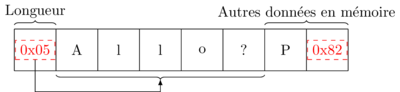

In [8]:
%%tikz -l calc,decorations.pathreplacing
\def\printit#1#2\relax{\ifx*#1\relax\node (node\x)
  [rectangle,draw,dashed,red] at ($(.5,.5)+(\x,0)$) {0x#2}\else\node
  (node\x) at ($(.5,.5)+(\x,0)$) {#1#2} \fi}

\draw (-1,0) grid (7,1);
\foreach \x/\y in
      {-1/*05,0/A,1/l,2/l,3/o,4/?,5/P,6/*82} { \expandafter\printit\y\relax; }

\draw[decorate,decoration={brace,amplitude=1mm,mirror,raise=1mm},yshift=0pt]
      (0,0)--(5,0);
\draw[-latex] (node-1)|-(0,-.5)-|(2.5,-.2);
\draw[decorate,decoration={brace,amplitude=1mm,raise=1mm},yshift=0pt]
      (5,1)--(7,1)  node [black,midway,yshift=12pt] {Autres donn√©es en m√©moire};
\draw[decorate,decoration={brace,amplitude=1mm,raise=1mm},yshift=0pt]
      (-1,1)--(0,1) node [black,midway,yshift=12pt] {Longueur};


### Caract√®re terminal
Une autre possibilit√© est de marquer la fin de la cha√Æne avec un octet
particulier ou une s√©quence d'octets particuli√®re.  C'est le cas du langage
C (et de beaucoup d'autres langages d√©riv√©s) qui utilise le caract√®re nul.

√Ä l'int√©rieur d'un langage il n'y a en g√©n√©ral qu'une seule sorte de
cha√Æne.

> __Remarque :__ *Est-ce que le marqueur fait partie de la cha√Æne ?* En pratique, oui. Mais il ne fait pas partie du *texte* cod√© par la cha√Æne.

> **Exemple :** On stocke ici la cha√Æne ¬´ Allo? ¬ª (le P et la valeur 0x82 sont des √©l√©ments qui sont dans la m√©moire mais ne font pas partie de la cha√Æne).

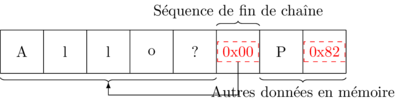

In [9]:
%%tikz -l calc,decorations.pathreplacing
\def\printit#1#2\relax{\ifx*#1\relax\node (node\x)
[rectangle,draw,dashed,red] at ($(.5,.5)+(\x,0)$) {0x#2}\else\node
(node\x) at ($(.5,.5)+(\x,0)$) {#1#2} \fi}
\draw (0,0) grid (8,1); \foreach \x/\y in
{0/A,1/l,2/l,3/o,4/?,5/*00,6/P,7/*82} { \expandafter\printit\y\relax; }
\draw
[decorate,decoration={brace,amplitude=1mm,mirror,raise=1mm},yshift=0pt]
(0,0)--(5,0); \draw[-latex] (node5)|-(4,-.5)-|(2.5,-.2);
\draw[decorate,decoration={brace,amplitude=1mm,mirror,raise=1mm},yshift=0pt]
      (6,0)--(8,0)  node [black,midway,yshift=-12pt] {Autres donn√©es en m√©moire};
\draw[decorate,decoration={brace,amplitude=1mm,raise=1mm},yshift=0pt]
      (5,1)--(6,1) node [black,midway,yshift=12pt] {S√©quence de fin de cha√Æne};


### L'√©chappement

Premier probl√®me, le choix de la s√©quence de fin.

1. Quand la longueur n'est pas sp√©cifi√©e √† c√¥t√© d'une cha√Æne, la fin de la cha√Æne est forc√©ment indiqu√©e par une s√©quence sp√©cifique de bits.
2. S'il existe une s√©quence sp√©cifique invalide dans le codage pour la repr√©sentation de caract√®res, alors on peut la choisir comme repr√©sentant la fin de cha√Æne.
3. Sinon, il faut choisir un caract√®re qui va coder la fin de la cha√Æne.
4. Comment coder une cha√Æne qui comporte ce caract√®re ?

Deuxi√®me probl√®me, les s√©quences signifiantes.

Parfois, on veut pouvoir utiliser dans des cha√Ænes des s√©quences qui ont
un sens sp√©cial. Par exemple, on pourrait vouloir que  `0x0F03`
repr√©sente le caract√®re ‡ºÉ qu'on
ne peut pas rentrer facilement au clavier. Mais dans ce cas, comment
√©crire la cha√Æne `0x0F03` ? (comme par exemple pour la phrase ¬´ Si on
met 0x0F03 dans une cha√Æne on obtient le
caract√®re ‡ºÉ ¬ª ?

Il faut donc utiliser une proc√©dure d'√©chappement !

\item On utilise une s√©quence (parfois codante) d'√©chappement qui permet de
modifier le sens des caract√®res qui suivent
\item Si la s√©quence d'√©chappement est codante, on doit pr√©voir au moins une
combinaison qui permet de redonner le caract√®re d'√©chappement
\item Avoir des cha√Ænes interpr√©tables complique √©norm√©ment les op√©rations
√©l√©mentaires, comme calculer le nombre de caract√®res dans la cha√Æne, ou
savoir si un caract√®re est pr√©sent dans la cha√Æne.
\item[\dialogwarning] On se retrouve souvent √† ¬´~empiler~¬ª les modes
d'√©chappement identiques ou diff√©rents.
\end{itemize}

> **Exemple :** En langage C et d'autres (Python par exemple), le caract√®re `\` est utilis√© pour
introduire des s√©quences d'√©chappement. `\0` est le caract√®re nul, `\n` est le caract√®re de nouvelle ligne, `\t` est le caract√®re de tabulation, `\xxx` est le caract√®re de num√©ro octal _xxx_... 

In [10]:
u.activite("√âchappements en C")
u.mark("Dessinez la structure en m√©moire ds cha√Ænes C suivantes, et montrez comment elles s'affichent sur un terminal.")
strings=[[b"Toto",b"Kaivik"],[b"Bonjour !\n",b"C'est lundi !\n"],[b"Acheter:\n\tponey\n\tporte-avions\n",b"Un philosophe\n\tparle\ndu temps.\n"],[b"Caf\303\251\n",b"Cr\303\250me"]]

def displaychar(l):
    n=''
    if l<128 and l>32:
        n=chr(l)
    elif l==32:
        n='‚çΩ'
    elif l==10:
        n='\\n'
    elif l==9:
        n='\\t'
    elif l==0:
        n='\\0'
    else:
        n='\\{0:03o}'.format(l)
    return n


for sx in strings:
    s=random.choice(sx)
    a=''
    t=[]
    h=[]
    lh=[]
    i=0
    for l in s:
        n=displaychar(l)
        a=a+n
        t.append(n)
        h.append(str(i))
        i=i+1
        lh.append("-")
    n=displaychar(0)
    t.append(n)
    h.append(str(i))
    i=i+1
    lh.append("-")
    table='\n'.join( [ "|"+("|".join(uu))+"|" for uu in [h,lh,t]])
    u.mark('  * `{0}`'.format(a))
    u.mark(table)
    u.mark('Affichage:<pre>{0}</pre>'.format(s.decode('utf8')))
    if s.decode('utf8')!=s.decode('iso-8859-15'):
        u.mark('_Attention, l¬¥affichage ci-dessus d√©pend du terminal ! Ici on a choisi UTF-8_')

#### Activit√© : √âchappements en C

Dessinez la structure en m√©moire ds cha√Ænes C suivantes, et montrez comment elles s'affichent sur un terminal.

  * `Kaivik`

|0|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|K|a|i|v|i|k|\0|

Affichage:<pre>Kaivik</pre>

  * `C'est‚çΩlundi‚çΩ!\n`

|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|C|'|e|s|t|‚çΩ|l|u|n|d|i|‚çΩ|!|\n|\0|

Affichage:<pre>C'est lundi !
</pre>

  * `Acheter:\n\tponey\n\tporte-avions\n`

|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|A|c|h|e|t|e|r|:|\n|\t|p|o|n|e|y|\n|\t|p|o|r|t|e|-|a|v|i|o|n|s|\n|\0|

Affichage:<pre>Acheter:
	poney
	porte-avions
</pre>

  * `Cr\303\250me`

|0|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|C|r|\303|\250|m|e|\0|

Affichage:<pre>Cr√®me</pre>

_Attention, l¬¥affichage ci-dessus d√©pend du terminal ! Ici on a choisi UTF-8_

In [11]:
u.activite("√âchappements en C ‚Äî la vengeance")
from ast import literal_eval
u.mark("Une bizarrerie historique du C/C++ fait que certaines s√©quences sont remplac√©es avant que le programme ne soit ex√©cut√© par d'autres caract√®res:")
trigraphes={
    '??(':'[',
    '??)':']',
    '??<':'{',
    '??>':'}',
    '??=':'#',
    '??/':'\\',
    '??\'':'^',
    '??!':'|',
    '??-':'~'
    }
t="|Trigraphe|R√©sultat|\n|-|-|\n|"+"|\n|".join([u+"|"+(v if v!="|" else "&vert;") for u,v in trigraphes.items()])+"|\n"
u.mark(t)

u.mark("Dessinez la structure en m√©moire ds cha√Ænes C suivantes telles qu'elles sont dans la m√©moire du programme ex√©cut√©, et montrez comment elles s'affichent sur un terminal.")
strings=[[b"Hello??!"],[b"Bye??/n"]]
def displaychar(l):
    n=''
    if l<128 and l>32:
        n=chr(l)
    elif l==32:
        n='‚çΩ'
    elif l==10:
        n='\\n'
    elif l==9:
        n='\\t'
    elif l==0:
        n='\\0'
    else:
        n='\\{0:03o}'.format(l)
    return n

for sx in strings:
    s=random.choice(sx)
    sasstring=s.decode("utf-8")
    for key,val in trigraphes.items():
        sasstring=sasstring.replace(key,val)
    print
    st=bytes(literal_eval('"'+sasstring+'"'),encoding="utf-8")
    a=''
    for l in s:
        n=displaychar(l)
        a=a+n
    t=[]
    h=[]
    lh=[]
    i=0
    for l in st:
        n=displaychar(l)
        t.append(n)
        h.append(str(i))
        i=i+1
        lh.append("-")
    n=displaychar(0)
    t.append(n)
    h.append(str(i))
    i=i+1
    lh.append("-")
    table='\n'.join( [ "|"+("|".join(uu))+"|" for uu in [h,lh,t]])
    u.mark('  * `{0}`'.format(a))
    u.mark(table)
    u.mark('Affichage:<pre>{0}</pre>'.format(st.decode('utf8')))
    if st.decode('utf8')!=st.decode('iso-8859-15'):
        u.mark('_Attention, l¬¥affichage ci-dessus d√©pend du terminal ! Ici on a choisi UTF-8_')
u.mark("Quels sont les probl√®mes qui pourraient arriver avec ce syst√®me tel qu'il est d√©crit ?")
u.solution("Outre des choses surprenantes lorsqu'on ne conna√Æt pas leur existence, il est difficile de repr√©senter une suite de deux points d'interrogation suivis par exemple d'un point d'exclamation.")

#### Activit√© : √âchappements en C ‚Äî la vengeance

Une bizarrerie historique du C/C++ fait que certaines s√©quences sont remplac√©es avant que le programme ne soit ex√©cut√© par d'autres caract√®res:

|Trigraphe|R√©sultat|
|-|-|
|??(|[|
|??)|]|
|??<|{|
|??>|}|
|??=|#|
|??/|\|
|??'|^|
|??!|&vert;|
|??-|~|


Dessinez la structure en m√©moire ds cha√Ænes C suivantes telles qu'elles sont dans la m√©moire du programme ex√©cut√©, et montrez comment elles s'affichent sur un terminal.

  * `Hello??!`

|0|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|H|e|l|l|o|||\0|

Affichage:<pre>Hello|</pre>

  * `Bye??/n`

|0|1|2|3|4|
|-|-|-|-|-|
|B|y|e|\n|\0|

Affichage:<pre>Bye
</pre>

Quels sont les probl√®mes qui pourraient arriver avec ce syst√®me tel qu'il est d√©crit ?

Votre proposition > `_____________________________________________________`

**Solution:** Outre des choses surprenantes lorsqu'on ne conna√Æt pas leur existence, il est difficile de repr√©senter une suite de deux points d'interrogation suivis par exemple d'un point d'exclamation.

In [12]:
u.xtoggle()

Mode interactif
